In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].max()

255

In [7]:
x_train = x_train/255

In [8]:
x_test = x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape = (32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape = (32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Output layer

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [18]:
model.fit(x_train, y_cat_train,epochs=15,
         validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 7s 143us/sample - loss: 1.4758 - accuracy: 0.4700 - val_loss: 1.2371 - val_accuracy: 0.5601
Epoch 2/15
50000/50000 [==============================] - 5s 103us/sample - loss: 1.1600 - accuracy: 0.5903 - val_loss: 1.1239 - val_accuracy: 0.6065
Epoch 3/15
50000/50000 [==============================] - 5s 103us/sample - loss: 1.0104 - accuracy: 0.6479 - val_loss: 1.0788 - val_accuracy: 0.6244
Epoch 4/15
50000/50000 [==============================] - 5s 104us/sample - loss: 0.8980 - accuracy: 0.6862 - val_loss: 0.9951 - val_accuracy: 0.6585
Epoch 5/15
50000/50000 [==============================] - 5s 102us/sample - loss: 0.8064 - accuracy: 0.7183 - val_loss: 0.9482 - val_accuracy: 0.6722
Epoch 6/15
50000/50000 [==============================] - 5s 103us/sample - loss: 0.7299 - accuracy: 0.7442 - val_loss: 0.9650 - val_accuracy: 0.6768
Epoch 7/15
50000/50000 [==========================

In [19]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

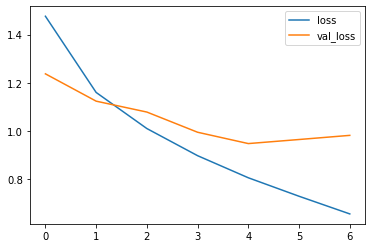

In [20]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

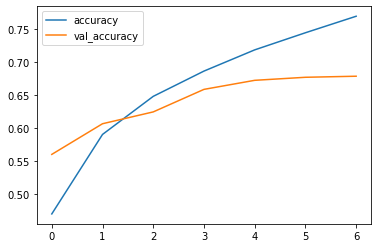

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

In [22]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.9822 - accuracy: 0.6784


[0.9821705587387085, 0.6784]

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
prediction = model.predict_classes(x_test)

In [25]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.77      0.80      0.78      1000
           2       0.58      0.53      0.55      1000
           3       0.52      0.48      0.50      1000
           4       0.60      0.67      0.63      1000
           5       0.66      0.49      0.56      1000
           6       0.76      0.75      0.76      1000
           7       0.74      0.71      0.73      1000
           8       0.74      0.81      0.78      1000
           9       0.71      0.78      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [26]:
confusion_matrix(y_test, prediction)

array([[747,  26,  40,  14,  31,   4,   5,   9,  93,  31],
       [ 35, 797,   3,   6,   6,   2,   7,   1,  42, 101],
       [ 92,  16, 534,  70,  89,  52,  71,  31,  18,  27],
       [ 22,  26,  82, 483, 101, 111,  64,  42,  35,  34],
       [ 26,   8,  77,  54, 669,  26,  44,  63,  20,  13],
       [ 18,   9,  76, 189,  70, 492,  31,  79,  12,  24],
       [ 11,  23,  59,  45,  49,  15, 753,   9,  13,  23],
       [ 24,  12,  35,  40,  87,  36,  10, 714,   5,  37],
       [ 80,  35,  12,  10,   3,   3,   3,   6, 815,  33],
       [ 48,  86,   7,  15,   9,   2,   1,   9,  43, 780]], dtype=int64)

In [27]:
import seaborn as sns

<AxesSubplot:>

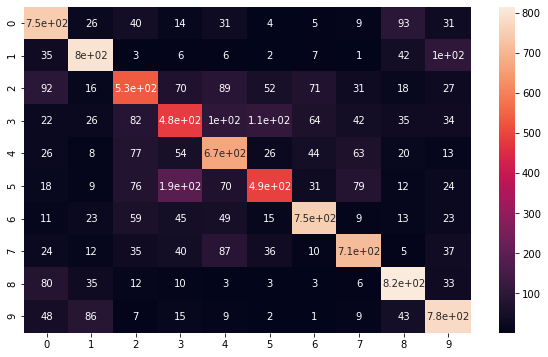

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, prediction),annot=True)

In [29]:
my_image = x_test[16]

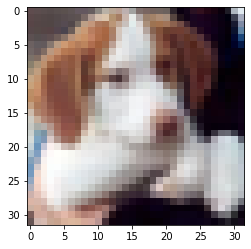

In [30]:
plt.imshow(my_image)

In [31]:
y_test[16]

array([5], dtype=uint8)

In [32]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)